In [1]:
from importlib import reload

In [78]:
import data_extraction

In [79]:
reload(data_extraction)

<module 'data_extraction' from '/Users/atakan1/Desktop/Computer Vision/project/code/data_extraction.py'>

In [2]:
from data_extraction import *
import matplotlib.pyplot as plt

In [4]:
event_data = read_event_data("../data/bball_dataset_april_4.csv")
bbox_data = read_bboxes_data("../data/train_test_val_merged_detections_v2_ts_fixed.csv")

In [5]:
event_data.head()

,#YoutubeId,VideoWidth,VideoHeight,ClipStartTime,ClipEndTime,EventStartTime,EventEndTime,EventStartBallX,EventStartBallY,EventLabel,TrainValOrTest
0,-VcfnuYRhMU,490,360,2377375.000,2400664.933,2384913.177,2384972.840,0.376000,0.242884,layup failure,train
1,-XPEvIMe05A,490,360,1020386.033,1055254.200,1050422.765,1051247.263,0.582667,0.288425,layup success,test
2,8Kg9jj9hzGQ,490,360,1227993.433,1273505.566,-1.000,1261500.152,-1.000000,-1.000000,steal success,train
3,8Kg9jj9hzGQ,490,360,1227993.433,1273505.566,1254131.452,1255201.545,0.698667,0.445920,other 2-pointer failure,train
4,8Kg9jj9hzGQ,490,360,1227993.433,1273505.566,1241897.745,1243128.008,0.548000,0.352941,other 2-pointer failure,train


In [6]:
bbox_data.head()

,Youtube ID,Time,Top-left x,Top-left y,Width,Height,player-id
0,-KUYDYCwnOQ,518684833,0.3306,0.6090,0.0919,0.3400,person_0_00511477633
1,-KUYDYCwnOQ,518684833,0.3359,0.4698,0.0861,0.3161,person_6_00511477633
2,-KUYDYCwnOQ,518684833,0.4099,0.3784,0.0841,0.3056,person_14_00511477633
3,-KUYDYCwnOQ,518684833,0.5091,0.2676,0.0723,0.2190,person_10_00511477633
4,-KUYDYCwnOQ,518684833,0.5394,0.1466,0.0802,0.2086,person_26_00511477633


In [7]:
video_id = "-XPEvIMe05A"

In [8]:
import os

In [22]:
len(os.listdir("events"))

65

In [38]:
events_paths = [os.path.join("events", event) for event in ["event_{}.webm".format(i) for i in range(65)]]

In [39]:
video_data = event_data[event_data["#YoutubeId"] == video_id]

In [40]:
events_paths

['events/event_0.webm',
 'events/event_1.webm',
 'events/event_2.webm',
 'events/event_3.webm',
 'events/event_4.webm',
 'events/event_5.webm',
 'events/event_6.webm',
 'events/event_7.webm',
 'events/event_8.webm',
 'events/event_9.webm',
 'events/event_10.webm',
 'events/event_11.webm',
 'events/event_12.webm',
 'events/event_13.webm',
 'events/event_14.webm',
 'events/event_15.webm',
 'events/event_16.webm',
 'events/event_17.webm',
 'events/event_18.webm',
 'events/event_19.webm',
 'events/event_20.webm',
 'events/event_21.webm',
 'events/event_22.webm',
 'events/event_23.webm',
 'events/event_24.webm',
 'events/event_25.webm',
 'events/event_26.webm',
 'events/event_27.webm',
 'events/event_28.webm',
 'events/event_29.webm',
 'events/event_30.webm',
 'events/event_31.webm',
 'events/event_32.webm',
 'events/event_33.webm',
 'events/event_34.webm',
 'events/event_35.webm',
 'events/event_36.webm',
 'events/event_37.webm',
 'events/event_38.webm',
 'events/event_39.webm',
 'events/e

In [41]:
event_map = create_events_map(event_data=video_data, events_paths_list=events_paths)

In [42]:
reverse_event_map = {value: key for key, value in event_map.items()}

In [43]:
video_bbox = bbox_data[bbox_data["Youtube ID"] == video_id]

In [44]:
event_bboxtimes_map = create_eventbboxtimes_map(video_bbox, event_map)

In [45]:
width, height = 490, 360

In [46]:
events_paths[0]

'events/event_0.webm'

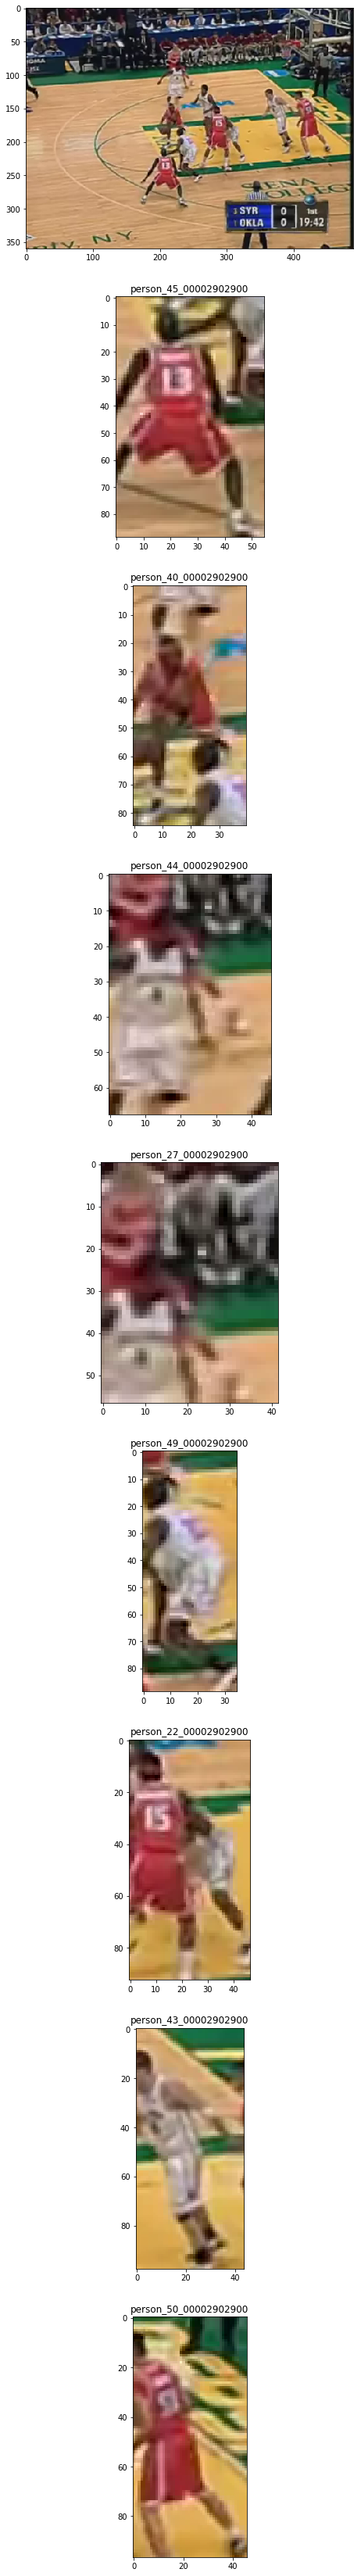

In [47]:
for frame, player_dict in extract_players_from_frames(events_paths[0], event_bboxtimes_map, reverse_event_map[events_paths[0]], video_bbox, width, height):
    fig, axes = plt.subplots(len(player_dict) + 1, 1, figsize=(60, 60))
    axes[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    for i, player_id in enumerate(player_dict):
        axes[i + 1].set_title(player_id)
        axes[i + 1].imshow(cv2.cvtColor(player_dict[player_id], cv2.COLOR_BGR2RGB))
    #n += 1
    #if n == 2:
    break
    

In [48]:
import tensorflow as tf
#import tensornets as nets

In [49]:
# boilerplate code
from __future__ import print_function
import os
from io import BytesIO
import numpy as np
from functools import partial
import PIL.Image
from IPython.display import clear_output, Image, display, HTML

In [50]:
model_fn = 'tensorflow_inception_graph.pb'

# creating TensorFlow session and loading the model
graph = tf.Graph()
sess = tf.InteractiveSession(graph=graph)
with tf.gfile.FastGFile(model_fn, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
t_input = tf.placeholder(np.float32, name='input') # define the input tensor
imagenet_mean = 117.0
t_preprocessed = tf.expand_dims(t_input-imagenet_mean, 0)
tf.import_graph_def(graph_def, {'input':t_input})

In [51]:
layers = [op.name for op in graph.get_operations() if op.type=='Conv2D' and 'import/' in op.name]
feature_nums = [int(graph.get_tensor_by_name(name+':0').get_shape()[-1]) for name in layers]

print('Number of layers', len(layers))
print('Total number of feature channels:', sum(feature_nums))


# Helper functions for TF Graph visualization

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = tf.compat.as_bytes("<stripped %d bytes>"%size)
    return strip_def
  
def rename_nodes(graph_def, rename_func):
    res_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = res_def.node.add() 
        n.MergeFrom(n0)
        n.name = rename_func(n.name)
        for i, s in enumerate(n.input):
            n.input[i] = rename_func(s) if s[0]!='^' else '^'+rename_func(s[1:])
    return res_def
  
def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))
  
    iframe = """
        <iframe seamless style="width:800px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# Visualizing the network graph. Be sure expand the "mixed" nodes to see their 
# internal structure. We are going to visualize "Conv2D" nodes.
tmp_def = rename_nodes(graph_def, lambda s:"/".join(s.split('_',1)))
show_graph(tmp_def)

Number of layers 59
Total number of feature channels: 7548


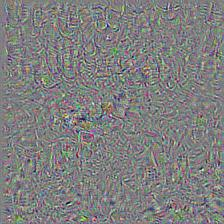

In [26]:
# Picking some internal layer. Note that we use outputs before applying the ReLU nonlinearity
# to have non-zero gradients for features with negative initial activations.
layer = 'softmax0_pre_activation'
channel = 139 # picking some feature channel to visualize

# start with a gray image with a little noise
img_noise = np.random.uniform(size=(224,224,3)) + 100.0

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 1)*255)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
def visstd(a, s=0.1):
    '''Normalize the image range for visualization'''
    return (a-a.mean())/max(a.std(), 1e-4)*s + 0.5

def T(layer):
    '''Helper for getting layer output tensor'''
    return graph.get_tensor_by_name("import/%s:0"%layer)

def render_naive(t_obj, img0=img_noise, iter_n=20, step=1.0):
    t_score = tf.reduce_mean(t_obj) # defining the optimization objective
    t_grad = tf.gradients(t_score, t_input)[0] # behold the power of automatic differentiation!
    
    img = img0.copy()
    for i in range(iter_n):
        g, score = sess.run([t_grad, t_score], {t_input:np.expand_dims(img, 0)})
        # normalizing the gradient, so the same step size should work 
        g /= g.std()+1e-8         # for different layers and networks
        img += (g*step).squeeze()
        print(score, end = ' ')
    clear_output()
    showarray(visstd(img))
    
render_naive(T(layer)[:, channel])

In [55]:
layer = "softmax0_pre_activation"
def T(layer):
    '''Helper for getting layer output tensor'''
    return graph.get_tensor_by_name("import/%s:0"%layer)


In [58]:
T(layer)

<tf.Tensor 'import/softmax0_pre_activation:0' shape=(?, 1008) dtype=float32>

In [59]:
import cv2 as cv

In [60]:
np.array([cv.resize(frame, (224, 224)), cv.resize(frame, (224, 224))]).squeeze().shape

(2, 224, 224, 3)

In [61]:
t_obj = T(layer)

feature = sess.run(t_obj, {t_input: np.array([cv.resize(frame, (224, 224)), cv.resize(frame, (224, 224))]).squeeze()})



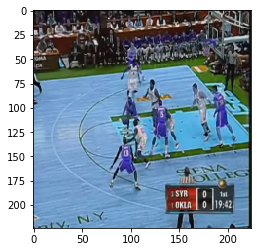

In [62]:
plt.imshow(cv.resize(frame, (224, 224)))

In [63]:
frame.shape

(360, 490, 3)

In [64]:
feature.shape

(2, 1008)

In [35]:
def tffunc(*argtypes):
    '''Helper that transforms TF-graph generating function into a regular one.
    See "resize" function below.
    '''
    placeholders = list(map(tf.placeholder, argtypes))
    def wrap(f):
        out = f(*placeholders)
        def wrapper(*args, **kw):
            return out.eval(dict(zip(placeholders, args)), session=kw.get('session'))
        return wrapper
    return wrap

# Helper function that uses TF to resize an image
def resize(img, size):
    img = tf.expand_dims(img, 0)
    return tf.image.resize_bilinear(img, size)[0,:,:,:]
resize = tffunc(np.float32, np.int32)(resize)


def calc_grad_tiled(img, t_grad, tile_size=512):
    '''Compute the value of tensor t_grad over the image in a tiled way.
    Random shifts are applied to the image to blur tile boundaries over 
    multiple iterations.'''
    sz = tile_size
    h, w = img.shape[:2]
    sx, sy = np.random.randint(sz, size=2)
    img_shift = np.roll(np.roll(img, sx, 1), sy, 0)
    grad = np.zeros_like(img)
    for y in range(0, max(h-sz//2, sz),sz):
        for x in range(0, max(w-sz//2, sz),sz):
            sub = img_shift[y:y+sz,x:x+sz]
            g = sess.run(t_grad, {t_input:sub})
            grad[y:y+sz,x:x+sz] = g
    return np.roll(np.roll(grad, -sx, 1), -sy, 0)

In [66]:
def render_multiscale(t_obj, img0=img_noise, iter_n=10, step=1.0, octave_n=3, octave_scale=1.4):
    t_score = tf.reduce_mean(t_obj) # defining the optimization objective
    t_grad = tf.gradients(t_score, t_input)[0] # behold the power of automatic differentiation!
    
    img = img0.copy()
    for octave in range(octave_n):
        if octave>0:
            hw = np.float32(img.shape[:2])*octave_scale
            img = resize(img, np.int32(hw))
        for i in range(iter_n):
            g = calc_grad_tiled(np.expand_dims(img, 0), t_grad)
            # normalizing the gradient, so the same step size should work 
            g /= g.std()+1e-8         # for different layers and networks
            img += (g*step).squeeze()
            print('.', end = ' ')
        clear_output()
        showarray(visstd(img))

# render_multiscale(T(layer)[:,:,:,channel])

NameError: name 'img_noise' is not defined

In [75]:
k = np.float32([1,4,6,4,1])
k = np.outer(k, k)
k5x5 = k[:,:,None,None]/k.sum()*np.eye(3, dtype=np.float32)

def lap_split(img):
    '''Split the image into lo and hi frequency components'''
    with tf.name_scope('split'):
        lo = tf.nn.conv2d(img, k5x5, [1,2,2,1], 'SAME')
        lo2 = tf.nn.conv2d_transpose(lo, k5x5*4, tf.shape(img), [1,2,2,1])
        hi = img-lo2
    return lo, hi

def lap_split_n(img, n):
    '''Build Laplacian pyramid with n splits'''
    levels = []
    for i in range(n):
        img, hi = lap_split(img)
        levels.append(hi)
    levels.append(img)
    return levels[::-1]

def lap_merge(levels):
    '''Merge Laplacian pyramid'''
    img = levels[0]
    for hi in levels[1:]:
        with tf.name_scope('merge'):
            img = tf.nn.conv2d_transpose(img, k5x5*4, tf.shape(hi), [1,2,2,1]) + hi
    return img

def normalize_std(img, eps=1e-10):
    '''Normalize image by making its standard deviation = 1.0'''
    with tf.name_scope('normalize'):
        std = tf.sqrt(tf.reduce_mean(tf.square(img)))
        return img/tf.maximum(std, eps)

def lap_normalize(img, scale_n=4):
    '''Perform the Laplacian pyramid normalization.'''
    img = tf.expand_dims(img,0)
    tlevels = lap_split_n(img, scale_n)
    tlevels = list(map(normalize_std, tlevels))
    out = lap_merge(tlevels)
    return out[0,:,:,:]

# Showing the lap_normalize graph with TensorBoard
lap_graph = tf.Graph()
with lap_graph.as_default():
    lap_in = tf.placeholder(np.float32, name='lap_in')
    lap_out = lap_normalize(lap_in)
show_graph(lap_graph)

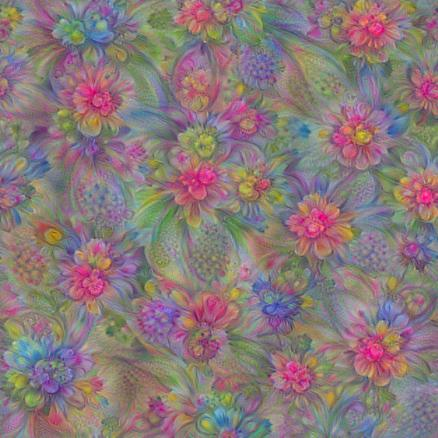

In [76]:
def render_lapnorm(t_obj, img0=img_noise, visfunc=visstd,
                   iter_n=10, step=1.0, octave_n=3, octave_scale=1.4, lap_n=4):
    t_score = tf.reduce_mean(t_obj) # defining the optimization objective
    t_grad = tf.gradients(t_score, t_input)[0] # behold the power of automatic differentiation!
    # build the laplacian normalization graph
    lap_norm_func = tffunc(np.float32)(partial(lap_normalize, scale_n=lap_n))

    img = img0.copy()
    for octave in range(octave_n):
        if octave>0:
            hw = np.float32(img.shape[:2])*octave_scale
            img = resize(img, np.int32(hw))
        for i in range(iter_n):
            g = calc_grad_tiled(img, t_grad)
            g = lap_norm_func(g)
            img += g*step
            print('.', end = ' ')
        clear_output()
        showarray(visfunc(img))

render_lapnorm(T(layer)[:,:,:,channel])

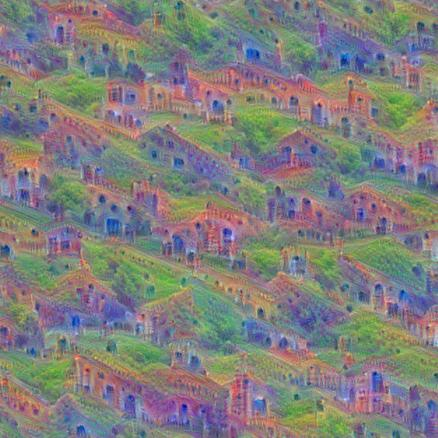

In [77]:
render_lapnorm(T(layer)[:,:,:,65])

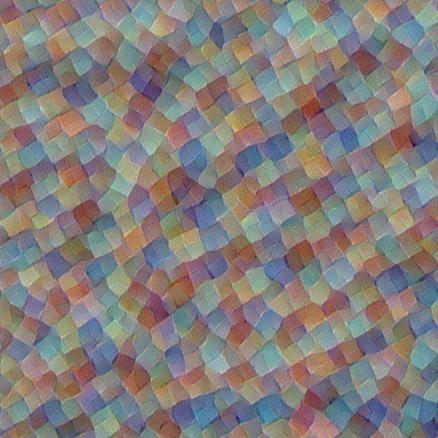

In [78]:
render_lapnorm(T('mixed3b_1x1_pre_relu')[:,:,:,101])

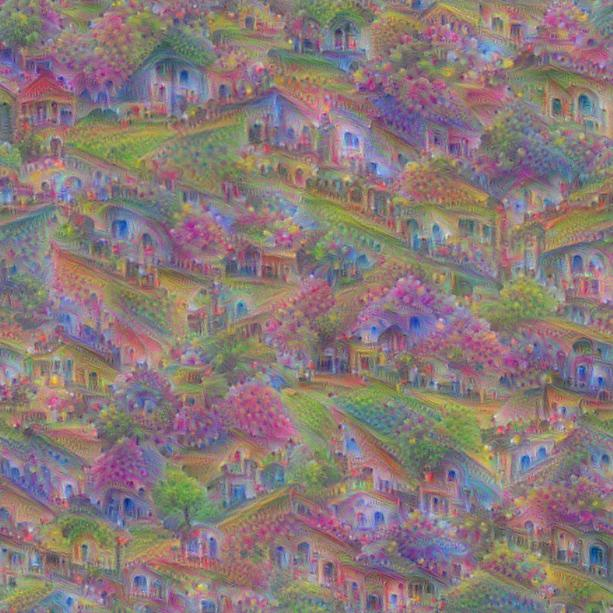

In [79]:
render_lapnorm(T(layer)[:,:,:,65]+T(layer)[:,:,:,139], octave_n=4)

In [83]:
def render_deepdream(t_obj, img0=img_noise,
                     iter_n=10, step=1.5, octave_n=4, octave_scale=1.4):
    t_score = tf.reduce_mean(t_obj) # defining the optimization objective
    t_grad = tf.gradients(t_score, t_input)[0] # behold the power of automatic differentiation!

    # split the image into a number of octaves
    img = img0
    octaves = []
    for i in range(octave_n-1):
        hw = img.shape[:2]
        lo = resize(img, np.int32(np.float32(hw)/octave_scale))
        hi = img-resize(lo, hw)
        img = lo
        octaves.append(hi)
    
    # generate details octave by octave
    for octave in range(octave_n):
        if octave>0:
            hi = octaves[-octave]
            img = resize(img, hi.shape[:2])+hi
        for i in range(iter_n):
            g = calc_grad_tiled(img, t_grad)
            img += g*(step / (np.abs(g).mean()+1e-7))
            print('.',end = ' ')
        clear_output()
        showarray(img/255.0)

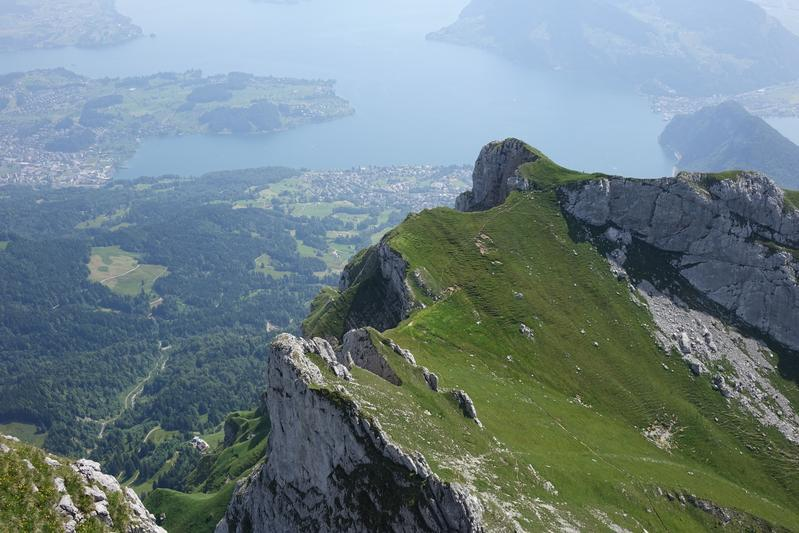

In [81]:
img0 = PIL.Image.open('pilatus800.jpg')
img0 = np.float32(img0)
showarray(img0/255.0)

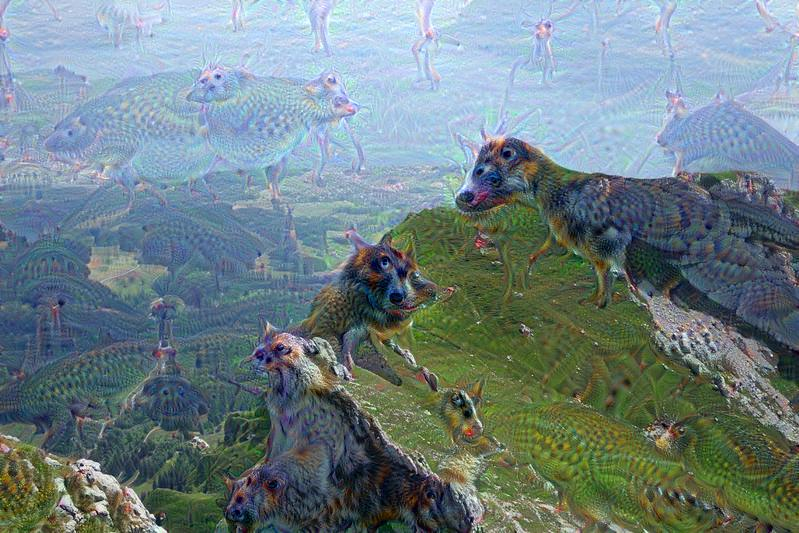

In [84]:
render_deepdream(tf.square(T('mixed4c')), img0)

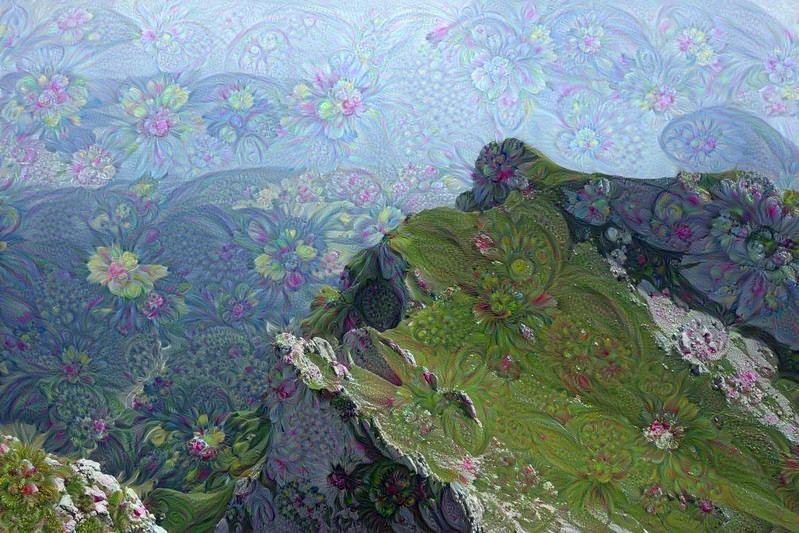

In [85]:
render_deepdream(T(layer)[:,:,:,139], img0)

In [67]:
t_obj = T("avgpool0")

In [68]:
t_obj

<tf.Tensor 'import/avgpool0:0' shape=(?, ?, ?, 1024) dtype=float32>

In [69]:
fr = cv.resize(frame, (224, 224))

In [70]:
feature = t_obj.eval({t_input: fr.reshape(1, *fr.shape)})

In [71]:
feature.squeeze().shape

(1024,)

In [72]:
def preprocess_frame(frame, new_shape, kernel_size, sigma):
    """Preprocess frame befor feeding the network
    
    Parameters
    ==========
    frame: np.float32
        image
    new_shape: tuple
        target resized image
    kernel_size: tuple
        kernel size for gaussian blur
    sigma: float
        sigma for gaussian blur
    """
    blured = cv.GaussianBlur(frame, kernel_size, sigma)
    resized = cv.resize(blured, new_shape)
    
    return resized

In [73]:
import numpy as np

In [74]:
def extract_frame_features(frame, t_obj, new_shape, kernel_size, sigma):
    """Extract frame features from network object
    
    Paramters
    =========
    frame: np.float32
        image to be extracted features assumed in shape [image_height, image_width, 3]
    t_obj: tf.Tensor
        tensorflow object to be evaluated
    new_shape: tuple
        target resized image
    kernel_size: tuple
        kernel size for gaussian blur
    sigma: float
        sigma for gaussian blur
    """
    preprocessed = preprocess_frame(frame, new_shape, kernel_size, sigma)
    
    preprocessed = np.expand_dims(preprocessed, 0)
    
    features = t_obj.eval({t_input: preprocessed})
    
    return features.squeeze()

In [75]:
frame_data = np.array([fr, fr, fr, fr])

In [76]:
extract_frame_features(fr, t_obj, (224, 224), (5, 5), 0.1).shape

(1024,)

In [77]:
def extract_appeareance_player(player_region, t_obj, new_shape, kernel_size, sigma, pool_size, strides):
    """Extract appearance feature
    
    Parameters
    ==========
    player_region: np.float32
        image of player region
    t_obj: tf.Tensor
        tensorflow object to be evaluated
    new_shape: tuple
        target resized image
    kernel_size: tuple
        kernel size for gaussian blur
    sigma: float
        sigma for gaussian blur
    pool_size: tuple
        shape of the pool size for average pooling
    strides: tuple
        stride
    """
    
    # TODO: Implement region proposals
    preprocessed = preprocess_frame(player_region, new_shape, kernel_size, sigma)
    preprocessed = np.expand_dims(preprocessed, 0)
    
    t_avg_pool = tf.layers.average_pooling2d(t_obj, pool_size=pool_size, strides=strides, padding="VALID", name="avg_pool")
    features = t_avg_pool.eval({t_input: preprocessed})
    
    return features.reshape(-1)
    

In [78]:
t_obj = T("mixed4a")

In [79]:
t_obj.eval({t_input: np.expand_dims(fr, 0)}).shape

(1, 14, 14, 508)

In [80]:
pool_size = (7, 7)
strides = (7, 7)

In [81]:
t_avg_pool = tf.layers.average_pooling2d(t_obj, pool_size=pool_size, strides=strides, padding="VALID", name="avgpool")

In [82]:
avg_pool = sess.run(t_avg_pool, {t_input: np.expand_dims(fr, 0)})

In [83]:
avg_pool.reshape(-1).shape

(2032,)

In [84]:
player_dict

{'person_45_00002902900': array([[[ 99, 151, 193],
         [102, 159, 200],
         [115, 172, 213],
         ...,
         [180, 172, 174],
         [188, 176, 176],
         [197, 185, 185]],
 
        [[111, 158, 201],
         [108, 160, 202],
         [114, 166, 208],
         ...,
         [167, 170, 170],
         [176, 171, 170],
         [182, 177, 176]],
 
        [[115, 162, 205],
         [109, 161, 203],
         [108, 160, 202],
         ...,
         [172, 175, 175],
         [182, 177, 176],
         [177, 172, 171]],
 
        ...,
 
        [[126, 165, 204],
         [124, 165, 204],
         [121, 162, 201],
         ...,
         [151, 168, 193],
         [141, 166, 192],
         [142, 167, 193]],
 
        [[132, 174, 216],
         [132, 174, 216],
         [136, 178, 220],
         ...,
         [188, 202, 228],
         [159, 185, 209],
         [152, 178, 202]],
 
        [[128, 170, 212],
         [128, 170, 212],
         [128, 170, 212],
         ...,
   

In [85]:
player_dict["person_45_00002902900"].shape

(89, 55, 3)

In [86]:
extract_appeareance_player(player_dict["person_45_00002902900"], t_obj, new_shape=(224, 224), kernel_size=(5, 5), sigma=0.1, pool_size=(7, 7), strides=(7, 7)).shape

(2032,)

In [87]:
# 4x4 pixels in cell, 8x8 cells in image
# 2x2 cells in a block 4x4 blocks in image
# 4x4x2x2x9
# 4x4 cells in image
# 2x2 blocks
# 2x2x2x2x9
# 1x1x2x2x9
# 1x1x1x1x9


In [88]:
def pyramid(img, scale, kernel_size, sigma, lower_bound=0):
    yield img
    height, width = img.shape[:2]
    height, width = height // scale, width // scale

    while height > lower_bound and width > lower_bound:
        img = cv.GaussianBlur(img, kernel_size, sigma, sigma)
        img = cv.resize(img, (width, height))
        yield img
        height, width = height // scale, width // scale

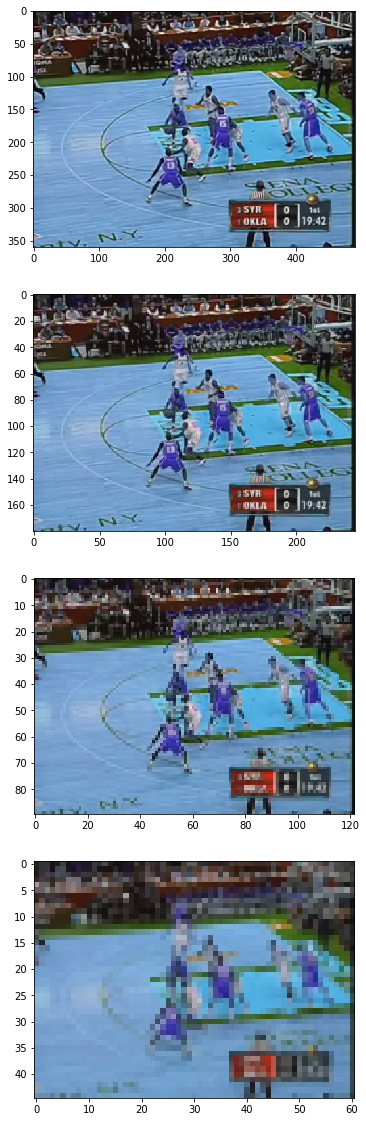

In [89]:
imgs = []
for img in pyramid(frame, 2, (5, 5), 0.1, 30):
    imgs.append(img)
    
fig, axes = plt.subplots(len(imgs), figsize=(20, 20))
for i, img in enumerate(imgs):
    axes[i].imshow(img)

In [90]:
player_dict["person_45_00002902900"].shape

(89, 55, 3)

In [91]:
player_region = player_dict["person_45_00002902900"]

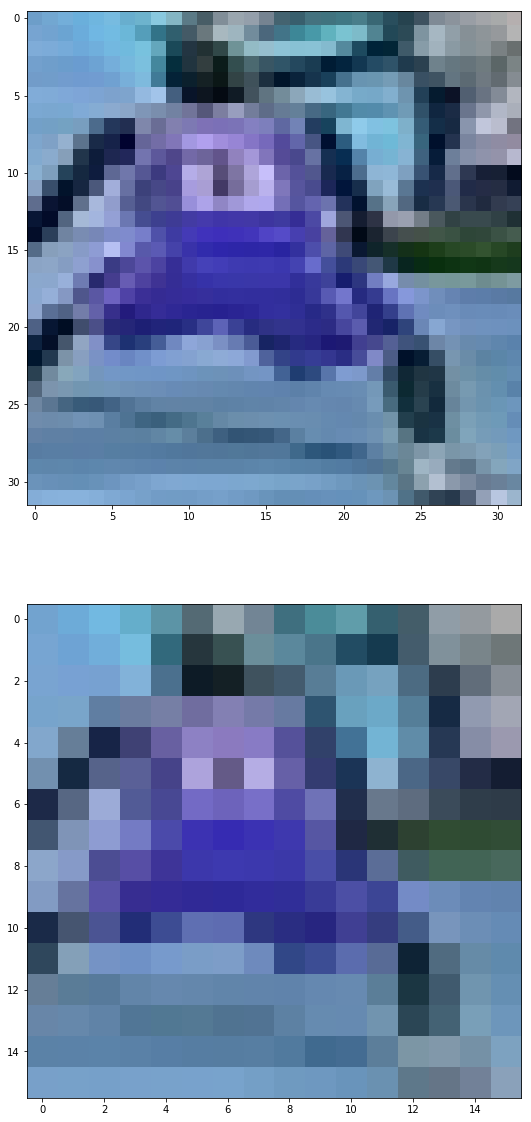

In [92]:
imgs = []
for img in pyramid(cv.resize(player_region, (32, 32)), 2, (5, 5), 0.1, 8):
    imgs.append(img)
    
fig, axes = plt.subplots(len(imgs), figsize=(20, 20))
for i, img in enumerate(imgs):
    axes[i].imshow(img)

In [93]:
from skimage import feature

In [94]:
(H, hogImage) = feature.hog(cv.resize(player_region, (32, 32)), orientations=18, pixels_per_cell=(4, 4),
    cells_per_block=(1, 1), transform_sqrt=True, block_norm="L1",
    visualize=True)

In [95]:
H.shape

(1152,)

In [96]:
H2 = feature.hog(cv.resize(player_region, (16, 16)), orientations=18, pixels_per_cell=(4, 4),
    cells_per_block=(1, 1), transform_sqrt=True, block_norm="L1")

In [97]:
H2.shape

(288,)

In [98]:
H2.shape[0] + H.shape[0]

1440

In [99]:
features = []
for img in pyramid(cv.resize(player_region, (32, 32)), 2, (5, 5), 0.1, 8):
    hog = feature.hog(img, orientations=18, pixels_per_cell=(4, 4), cells_per_block=(1, 1), transform_sqrt=True, block_norm="L1")
    features.append(hog)
    
np.hstack(features).shape


(1440,)

In [100]:
def extract_spatial_feature_from_player_region(player_region, shape, scale, kernel_size, sigma, lower_bound, orientations, pixels_per_cell, cells_per_block, block_norm):
    features = [feature.hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, block_norm=block_norm) for img in pyramid(cv.resize(player_region, shape), scale, kernel_size, sigma, lower_bound)]
    return np.hstack(features)

In [101]:
extract_spatial_feature_from_player_region(player_region, (32, 32), 2, (5, 5), 0.1, 15, 18, (4, 4), (1, 1), "L1")

array([0.29034449, 0.04668559, 0.        , ..., 0.        , 0.        ,
       0.21278804])

In [102]:
def extract_localized_features_for_person(player_region, 
                                          layer="mixed4a", 
                                          network_shape=(224, 224), 
                                          kernel_size=(5, 5), 
                                          sigma=0.1, 
                                          pool_size=(7, 7), 
                                          strides=(7, 7), 
                                          local_shape=(32, 32), 
                                          scale=2, 
                                          lower_bound=15, 
                                          orientations=18,
                                          pixels_per_cell=(4, 4),
                                          cells_per_block=(1, 1),
                                          block_norm="L1"):
    """Extract localized feature for each player
    
    Parameters
    ==========
    player_region: np.float32
        img to be extracted features
    layer: str
        layer to be used from network
    network_shape: tuple
        image shape valid for network
    kernel_size: tuple
        gaussian kernel size
    sigma: float
        sigma to be used for gaussian blur
    pool_size: tuple
        pool size for spatial features
    strides: tuple
        stride for avg pooling
    local_shape: tuple
        shape for local spatial histograms
    scale: int
        scale factor for pyramid
    lower_bound: float
        to be used in pyramid
    orientations: int
        number of orientations used to calculate hog features
    pixels_per_cell: tuple
        pixels per cell
    cells_per_block: tuple
        cells per block
    block_norm: str
        block normalization method
    """
    
    t_obj = T(layer)

    appearence_feature = extract_appeareance_player(player_region,
                                                    t_obj,
                                                    new_shape=network_shape,
                                                    kernel_size=kernel_size,
                                                    sigma=sigma,
                                                    pool_size=pool_size,
                                                    strides=strides)
    
    spatial_feature = extract_spatial_feature_from_player_region(player_region,
                                                                 local_shape,
                                                                 scale,
                                                                 kernel_size,
                                                                 sigma,
                                                                 lower_bound,
                                                                 orientations,
                                                                 pixels_per_cell,
                                                                 cells_per_block,
                                                                 block_norm)
    
    return np.hstack([appearence_feature, spatial_feature])

In [103]:
%%timeit -n 1
extract_localized_features_for_person(player_region).shape

182 ms ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [104]:
layer = "avgpool0"

In [105]:
T(layer)

<tf.Tensor 'import/avgpool0:0' shape=(?, ?, ?, 1024) dtype=float32>

In [147]:
events = []
for i in range(10):
    event = []
    for frame, player_dict in extract_players_from_frames(events_paths[i], event_bboxtimes_map, reverse_event_map[events_paths[i]], video_bbox, width, height):
        t_obj = T(layer)
        ft = extract_frame_features(frame=frame, kernel_size=(5, 5), new_shape=(224, 224), sigma=0.1, t_obj=t_obj)
        pt = []
        for player in player_dict:
            with tf.Session() as sess:
                pt.append(extract_localized_features_for_person(player_dict[player]))

        event.append((ft, pt))
    events.append(event)

In [122]:
%%timeit -n 1 -r 1
event_0 = []
for frame, player_dict in extract_players_from_frames(events_paths[0], event_bboxtimes_map, reverse_event_map[events_paths[0]], video_bbox, width, height):
    t_obj = T(layer)
    ft = extract_frame_features(frame=frame, kernel_size=(5, 5), new_shape=(224, 224), sigma=0.1, t_obj=t_obj)
    pt = []
    for player in player_dict:
        with tf.Session() as sess:
            pt.append(extract_localized_features_for_person(player_dict[player]))

    event_0.append((ft, pt))

1min 47s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [150]:
import pickle

In [151]:
with open('10_events.pkl', 'wb') as f:
    pickle.dump(events, f)

8